# FINAL PROJECT: MACHINE LEARNING APPLICATIONS

**Authors:**
- Carolina López De La Madriz (100475095)
- Álvaro Martín Ruiz (100475318)
- Jaime Salafranca Pardo (100475216)
- Emma Rodríguez Hervás (100475XXX)

**Course:** Machine Learning Application

---

## Overview

This project aims to apply the techniques and methodologies learned throughout the course *Machine Learning Applications* to address a relevant and socially impactful task: **detecting fake news in text documents**. The primary goal is to develop a system capable of distinguishing between real and fake news articles by considering Natual Language Processing (NLP), text vectorization techniques, and machine learning models. 

The project consists of the following tasks:

• Task 1. Natural Language Processing and text vectorization

• Task 2. Machine Learning:

– Task 2.1. Classification, Regression using feature extraction or selection techniques

– Task 2.2. Clustering using feature extraction or selection techniques

– Task 2.3. Recommendation Systems

• Task 3. Implementation of a dashboard using the Python Dash library.

• Task 4. Final report and presentation.

For the execution of the final project, students must choose to implement
any of the sub-Tasks 2 (either 2.1, 2.2 or 2.3), depending on their preferences
and the possibilities of the database used.


## Dataset and Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as pc
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
path_to_dataset = './datasets/fake_or_real_news.csv'
df = pd.read_csv(path_to_dataset, index_col = 0)
#df = pd.read_csv('./datasets/fake_or_real_news.csv', index_col = 0) if run in local

## 0. Exploratory Data Analysis

In [4]:
df.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# set the label class to 1 and 0
df['label'] = df['label'].replace({'REAL': 1, 'FAKE': 0})
df['label_name'] = df['label'].replace({1: 'REAL', 0: 'FAKE'})  # For plots
df.head(5)

,title,text,label,label_name
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,REAL


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6335 entries, 8476 to 4330
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6335 non-null   object
 1   text        6335 non-null   object
 2   label       6335 non-null   int64 
 3   label_name  6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 247.5+ KB
None


In [7]:
print("Dataset shape:", df.shape)
print("\nNull values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['label_name'].value_counts())

Dataset shape: (6335, 4)

Null values:
 title         0
text          0
label         0
label_name    0
dtype: int64

Class distribution:
 label_name
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [8]:
print("Null values in text:", df['text'].isnull().sum())

Null values in text: 0


In [9]:
print("NaN values in text:", df['text'].isna().sum())

NaN values in text: 0


In [10]:
# distribution os the labels
df['label'].value_counts()

label
1    3171
0    3164
Name: count, dtype: int64

In [11]:
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: text_length, dtype: float64


In [12]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

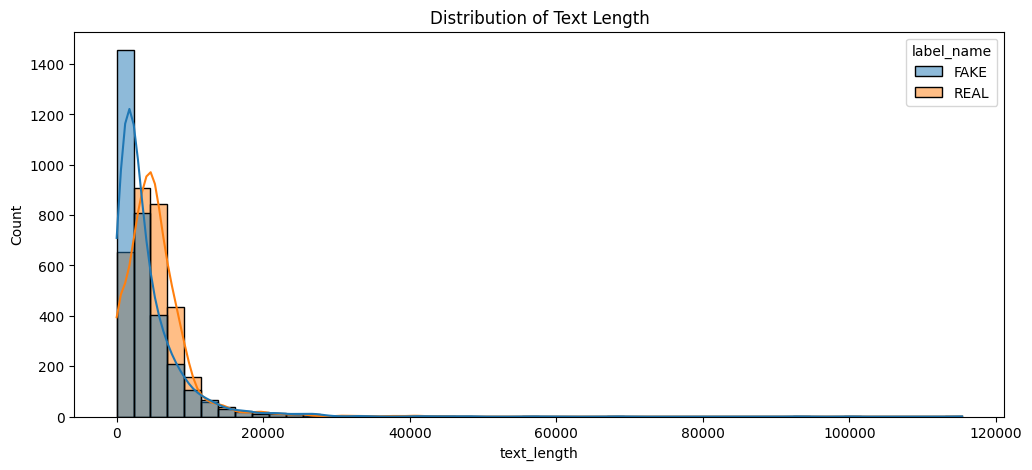

In [13]:
plt.figure(figsize=(12, 5))
sns.histplot(df, x='text_length', hue='label_name', bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.show()

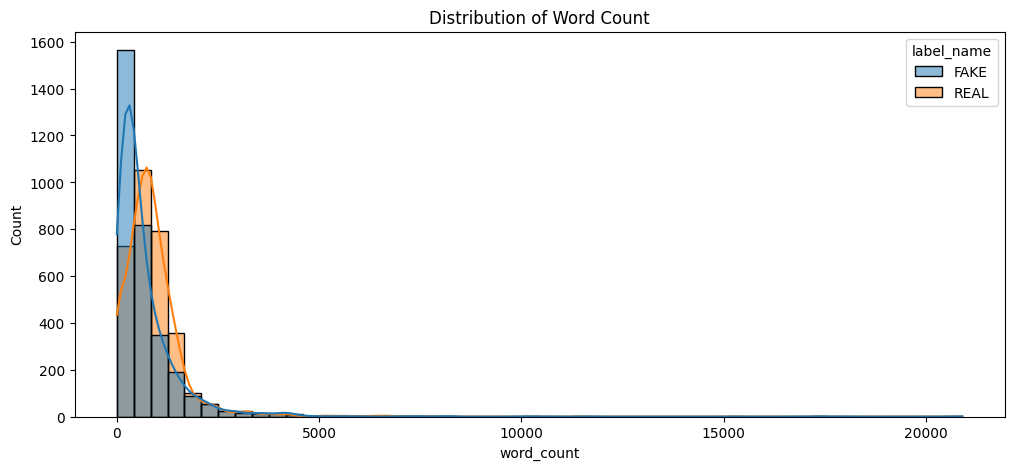

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(df, x='word_count', hue='label_name', bins=50, kde=True)
plt.title('Distribution of Word Count')
plt.show()

In [15]:
label_counts = df['label'].value_counts(normalize=True) * 100
print(f"\nClass Balance:\nFake: {label_counts[0]:.2f}%\nReal: {label_counts[1]:.2f}%")


Class Balance:
Fake: 49.94%
Real: 50.06%


In [16]:
# sample to speed up processing
df_reduced = df.sample(n=1000, random_state=42).reset_index(drop=True)

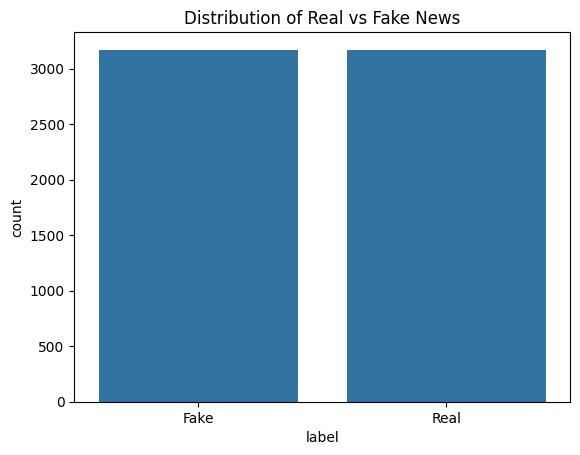

In [17]:
# Plot distribution of labels
sns.countplot(data=df, x='label')
plt.title("Distribution of Real vs Fake News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.show()

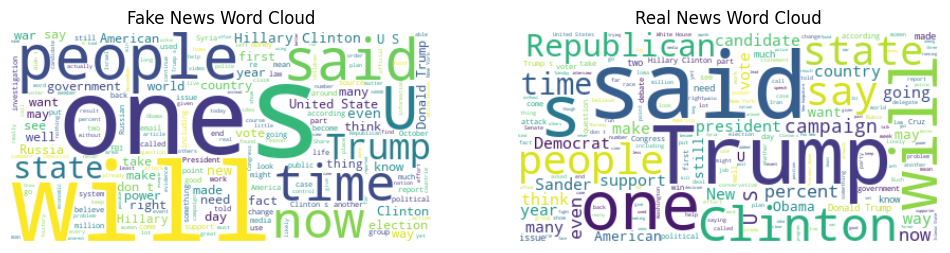

In [18]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

# Word clouds for FAKE
fake_text = " ".join(df[df['label'] == 0]['text'])
real_text = " ".join(df[df['label'] == 1]['text'])

fake_wc = WordCloud(stopwords=stopwords, background_color='white', max_words=200).generate(fake_text)
real_wc = WordCloud(stopwords=stopwords, background_color='white', max_words=200).generate(real_text)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Real News Word Cloud")
plt.show()


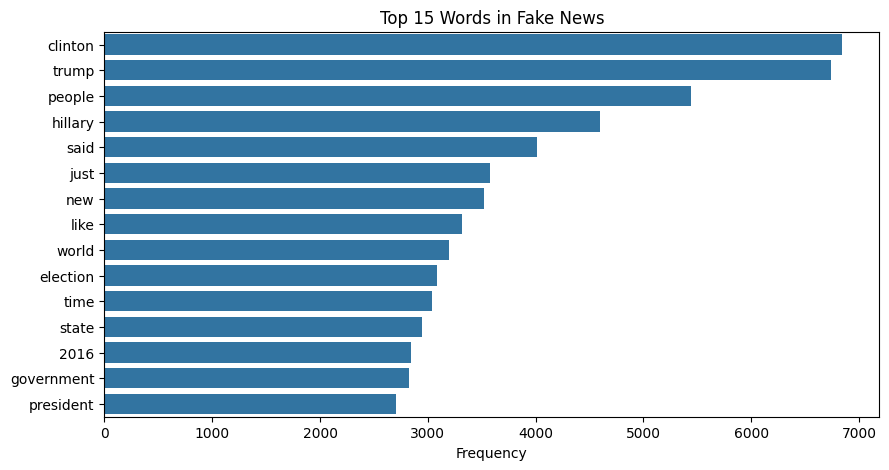

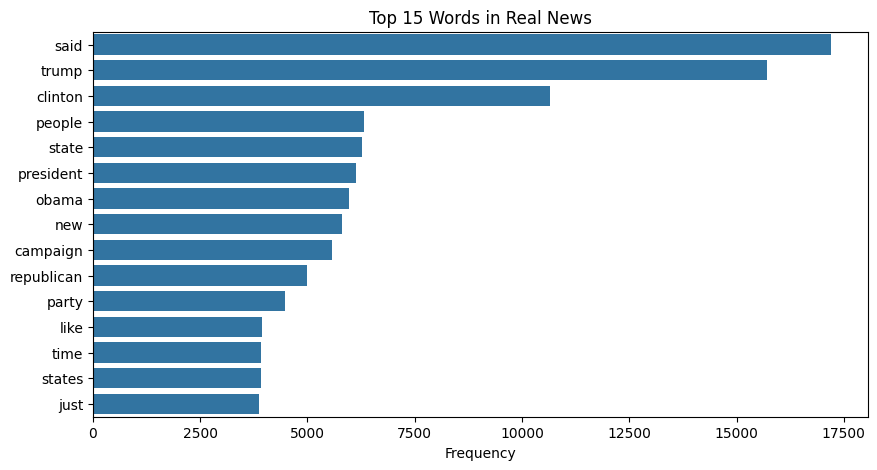

In [19]:
def get_top_n_words(corpus, n=20):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]


# Top words for each class
top_fake = get_top_n_words(df[df['label'] == 0]['text'], n=15)
top_real = get_top_n_words(df[df['label'] == 1]['text'], n=15)


# Plotting
def plot_top_words(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.show()


plot_top_words(top_fake, "Top 15 Words in Fake News")
plot_top_words(top_real, "Top 15 Words in Real News")

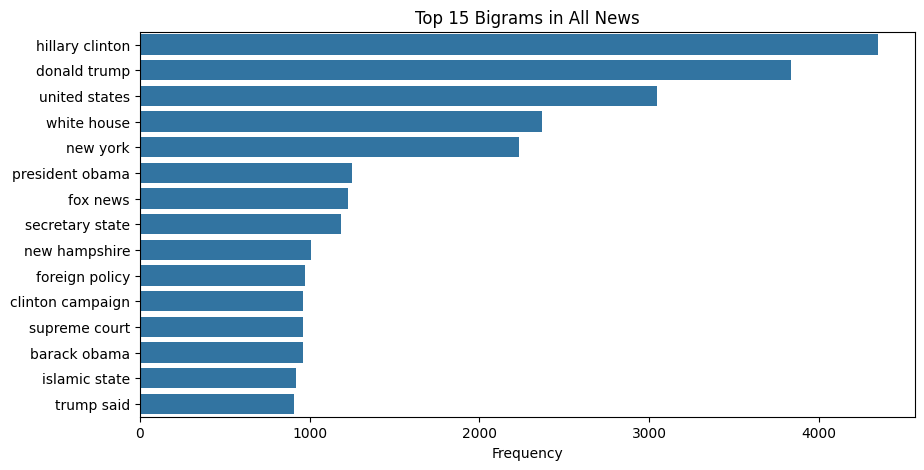

In [20]:
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]


top_bigrams = get_top_n_bigrams(df['text'], n=15)

# Plot bigrams
plot_top_words(top_bigrams, "Top 15 Bigrams in All News")


## 1. Natural Language Processing and text vectorization

The first task involves preparing and transforming raw news articles into a format suitable for machine learning models. We will implement a complete text preprocessing pipeline, including:
- Tokenization
- Lowercasing
- Removal of stopwords
- Lemmatization or stemming
- Removal of punctuation, special characters, and possibly named entities

For this task, we will use libraries such as SpaCy, NLTK, and scikit-learn to automate and optimize preprocessing.

Following this, we will explore multiple text vectorization strategies to represent the documents numerically:

- **Bag-of-Words (BoW)** and **TF-IDF**, which are classical and sparse representations.
- **Word2Vec** or **GloVe embeddings**, where we will compute document vectors by aggregating individual word vectors.
- **LDA Topic Modeling**, used to extract underlying themes from the articles. We will analyze the coherence of topics and select the optimal number of topics using coherence scores and/or perplexity.

Each representation will be evaluated and compared based on how well it contributes to the downstream classification task. Visualizations (e.g., topic distributions, word clouds, and vector heatmaps) will be included to support interpretability and analysis.

In [21]:
from tqdm import tqdm
import gensim
import gensim.downloader as api
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from gensim import corpora
import pyLDAvis.gensim_models
import pyLDAvis
import spacy
tqdm.pandas()

In [22]:
!python3 -m spacy download en_core_web_sm #jupyter notebook, without the 3 for pycharm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 8.1 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

## 1.1 Preprocessing Pipeline

In [24]:
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and token.lemma_.isalpha()
    ]
    return " ".join(tokens)

# Apply the pipeline to text
df_reduced['clean_text'] = df_reduced['text'].progress_apply(spacy_preprocess)
df_reduced['tokens'] = df_reduced['clean_text'].apply(lambda x: x.split())

100%|███████████████████████████████████████| 1000/1000 [03:22<00:00,  4.94it/s]


## 1.2 Vectorization

### BoW & TF-IDF

In [25]:
# Bag-of-Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df_reduced['clean_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_reduced['clean_text'])

print("BoW shape:", X_bow.shape)
print("TF-IDF shape:", X_tfidf.shape)


BoW shape: (1000, 5000)
TF-IDF shape: (1000, 5000)


### Word Embeddings (GloVe-based Aggregation)

In [26]:
# Load GloVe vectors (50D to reduce computation time)
glove_model = api.load("glove-wiki-gigaword-50")


def get_doc_vector(tokens):
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(glove_model.vector_size)


X_glove = np.vstack(df_reduced['tokens'].progress_apply(get_doc_vector))
X_glove = normalize(X_glove)

print("GloVe document embedding shape:", X_glove.shape)


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 666.68it/s]

GloVe document embedding shape: (1000, 50)


### LDA Topic Modeling

In [27]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(df_reduced['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_reduced['tokens']]

# Train LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    passes=10,
    random_state=42
)

# Print example topics
lda_model.print_topics(num_words=5)

[(0,
  '0.008*"say" + 0.007*"police" + 0.006*"water" + 0.004*"report" + 0.004*"people"'),
 (1,
  '0.006*"say" + 0.006*"state" + 0.005*"year" + 0.005*"clinton" + 0.005*"drug"'),
 (2,
  '0.011*"say" + 0.009*"court" + 0.008*"party" + 0.007*"house" + 0.006*"republican"'),
 (3,
  '0.028*"clinton" + 0.016*"email" + 0.010*"fbi" + 0.010*"hillary" + 0.009*"say"'),
 (4,
  '0.018*"say" + 0.007*"iran" + 0.007*"obama" + 0.007*"deal" + 0.006*"year"'),
 (5,
  '0.011*"say" + 0.010*"isis" + 0.006*"people" + 0.004*"group" + 0.004*"native"'),
 (6,
  '0.010*"war" + 0.008*"syria" + 0.006*"russia" + 0.006*"military" + 0.006*"government"'),
 (7,
  '0.015*"say" + 0.006*"state" + 0.006*"obama" + 0.005*"people" + 0.005*"attack"'),
 (8,
  '0.007*"people" + 0.004*"white" + 0.004*"year" + 0.004*"black" + 0.004*"like"'),
 (9,
  '0.025*"trump" + 0.013*"clinton" + 0.013*"say" + 0.008*"campaign" + 0.007*"state"')]

### Visualize LDA topics

In [28]:
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(
    lda_model, corpus, dictionary, n_jobs=1
)
pyLDAvis.display(lda_display)

In [51]:
import pyLDAvis.gensim_models
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

### Topic Distribution per Document

In [29]:
def get_topic_distribution(doc_bow):
    topics = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    return [prob for _, prob in topics]


lda_features = np.array([get_topic_distribution(bow) for bow in corpus])
print("LDA topic matrix shape:", lda_features.shape)


LDA topic matrix shape: (1000, 10)


In [30]:
# Print top 5 words for each of the 10 topics
for i, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {i}: {topic}")

Topic 0: 0.008*"say" + 0.007*"police" + 0.006*"water" + 0.004*"report" + 0.004*"people"
Topic 1: 0.006*"say" + 0.006*"state" + 0.005*"year" + 0.005*"clinton" + 0.005*"drug"
Topic 2: 0.011*"say" + 0.009*"court" + 0.008*"party" + 0.007*"house" + 0.006*"republican"
Topic 3: 0.028*"clinton" + 0.016*"email" + 0.010*"fbi" + 0.010*"hillary" + 0.009*"say"
Topic 4: 0.018*"say" + 0.007*"iran" + 0.007*"obama" + 0.007*"deal" + 0.006*"year"
Topic 5: 0.011*"say" + 0.010*"isis" + 0.006*"people" + 0.004*"group" + 0.004*"native"
Topic 6: 0.010*"war" + 0.008*"syria" + 0.006*"russia" + 0.006*"military" + 0.006*"government"
Topic 7: 0.015*"say" + 0.006*"state" + 0.006*"obama" + 0.005*"people" + 0.005*"attack"
Topic 8: 0.007*"people" + 0.004*"white" + 0.004*"year" + 0.004*"black" + 0.004*"like"
Topic 9: 0.025*"trump" + 0.013*"clinton" + 0.013*"say" + 0.008*"campaign" + 0.007*"state"


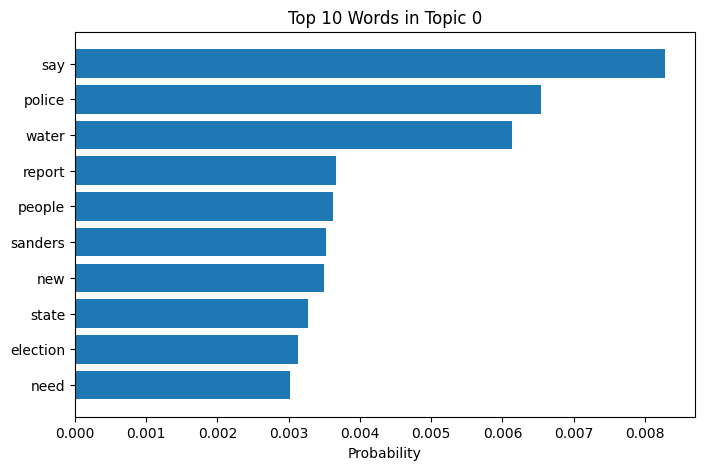

In [33]:
top_words_topic_0 = lda_model.show_topic(0, topn=10)
words, probs = zip(*top_words_topic_0)

plt.figure(figsize=(8, 5))
plt.barh(words, probs)
plt.gca().invert_yaxis()
plt.title("Top 10 Words in Topic 0")
plt.xlabel("Probability")
plt.show()

## 2. Machine Learning

### 2.1. Classification

Given that our dataset contains binary labels (fake or real), we choose to implement Task 2.1: Classification. Our objective is to build, evaluate, and compare the performance of several classifiers using different vectorization methods from Task 1.

We plan to experiment with the following classifiers:
- Logistic Regression
- Support Vector Machines (SVM)
- Random Forest
- Gradient Boosting (e.g., XGBoost)
- (Optional) Neural Networks or transformer-based models (e.g., BERT)

The dataset's textual features will be complemented by optional metadata (e.g., publication source, article length, publication date) to explore their impact on classification performance. We will also incorporate feature selection or extraction techniques (e.g., chi-square, PCA, mutual information) to reduce dimensionality and improve performance.

Evaluation will be carried out using:
- Accuracy, Precision, Recall, F1-score
- ROC-AUC curves
- Confusion matrices
- Cross-validation techniques
- GridSearchCV or RandomizedSearchCV for hyperparameter tuning

Performance comparisons will be made across all models and feature representations to determine the most effective approach for fake news detection.

In [31]:
from sklearn.model_selection import train_test_split

# Target variable
y = df_reduced['label']

# Split TF-IDF data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay
)


def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n🔍 Results for {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    if y_proba is not None:
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f"ROC Curve - {name}")
        plt.show()

### Logistic Regression (TF-IDF)


🔍 Results for Logistic Regression (TF-IDF)
Accuracy: 0.91
Precision: 0.967032967032967
Recall: 0.8543689320388349
F1-score: 0.9072164948453608
ROC-AUC: 0.9605645080572515


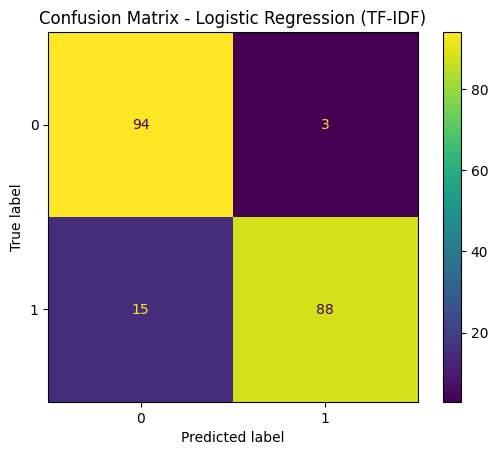

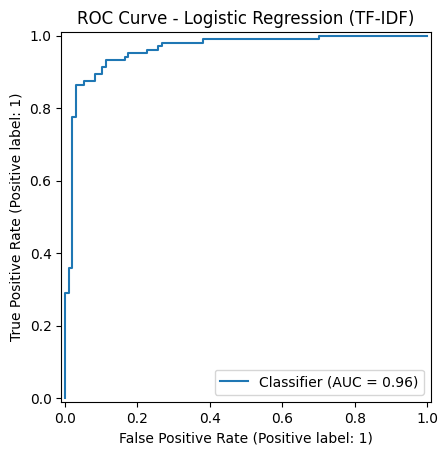

In [33]:
logreg = LogisticRegression(max_iter=1000)
evaluate_model(logreg, X_train_tfidf, X_test_tfidf, y_train, y_test, name="Logistic Regression (TF-IDF)")

### Randomn Forest (TF-IDF)


🔍 Results for Random Forest (TF-IDF)
Accuracy: 0.87
Precision: 0.8969072164948454
Recall: 0.8446601941747572
F1-score: 0.87
ROC-AUC: 0.9345410869782805


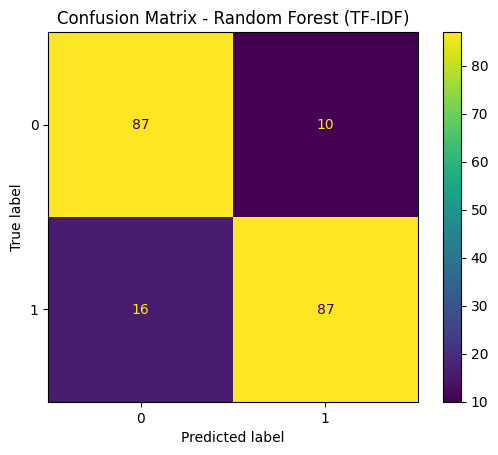

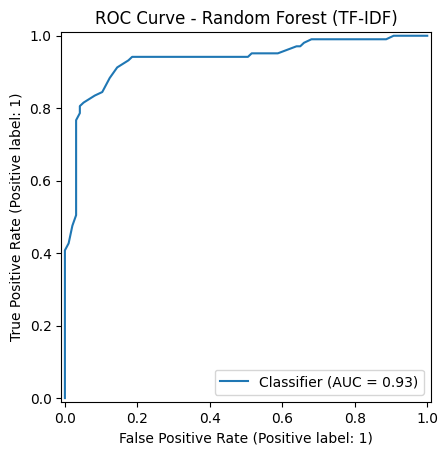

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, X_train_tfidf, X_test_tfidf, y_train, y_test, name="Random Forest (TF-IDF)")

### SVM (TF-IDF)


🔍 Results for SVM (TF-IDF)
Accuracy: 0.925
Precision: 0.9782608695652174
Recall: 0.8737864077669902
F1-score: 0.9230769230769231
ROC-AUC: 0.9660694625162647


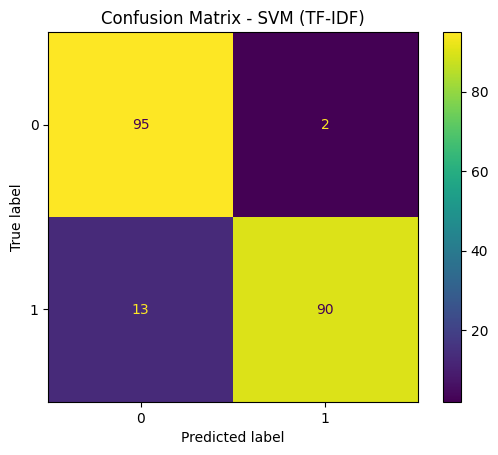

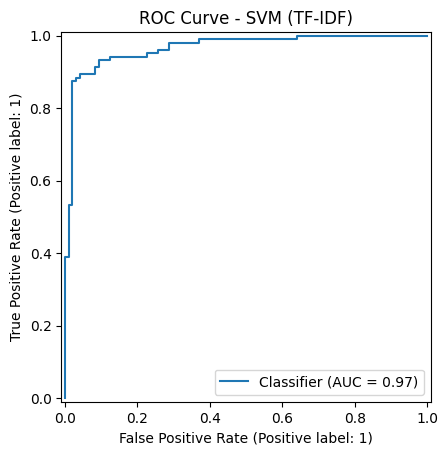

In [35]:
svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, X_train_tfidf, X_test_tfidf, y_train, y_test, name="SVM (TF-IDF)")

### XGBoost (TF-IDF)

In [40]:
import os

#######todo

### Compare with GloVe and LDA vectors

In [36]:
from sklearn.model_selection import train_test_split

# GloVe
X_train_glove, X_test_glove, _, _ = train_test_split(
    X_glove, y, test_size=0.2, random_state=42, stratify=y
)

# LDA
X_train_lda, X_test_lda, _, _ = train_test_split(
    lda_features, y, test_size=0.2, random_state=42, stratify=y
)

### Logistic Regression (GloVe)


🔍 Results for Logistic Regression (GloVe)
Accuracy: 0.735
Precision: 0.7551020408163265
Recall: 0.7184466019417476
F1-score: 0.736318407960199
ROC-AUC: 0.821739565609048


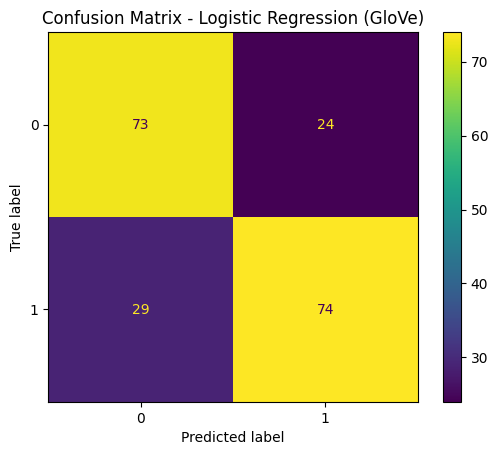

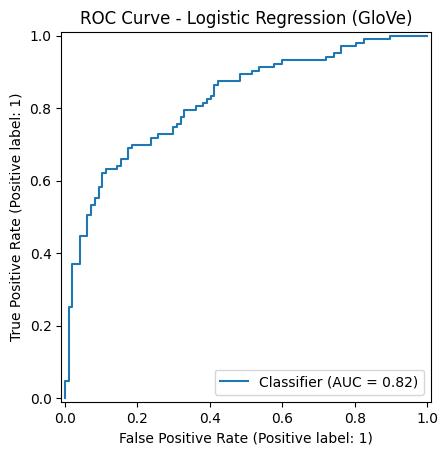

In [37]:
logreg_glove = LogisticRegression(max_iter=1000)
evaluate_model(logreg_glove, X_train_glove, X_test_glove, y_train, y_test, name="Logistic Regression (GloVe)")

### Random Forest with LDA


🔍 Results for Random Forest (LDA)
Accuracy: 0.765
Precision: 0.7857142857142857
Recall: 0.7475728155339806
F1-score: 0.7661691542288557
ROC-AUC: 0.8575718146331698


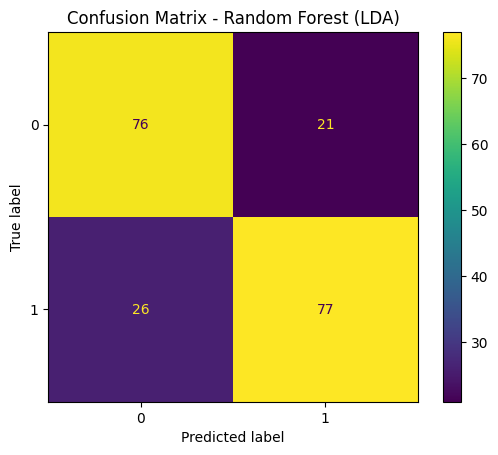

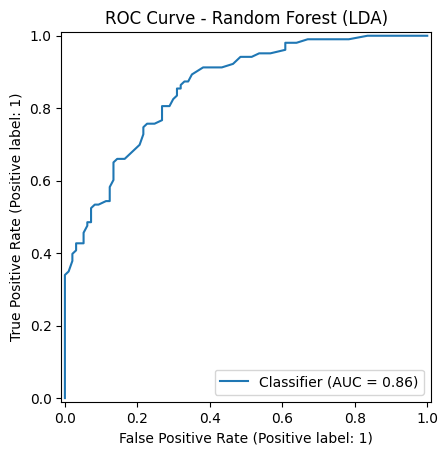

In [38]:
rf_lda = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_lda, X_train_lda, X_test_lda, y_train, y_test, name="Random Forest (LDA)")

### GridSearchCV for hyperparameter tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits

🔍 Results for Best Random Forest (TF-IDF)
Accuracy: 0.905
Precision: 0.92
Recall: 0.8932038834951457
F1-score: 0.9064039408866995
ROC-AUC: 0.9420478430587528


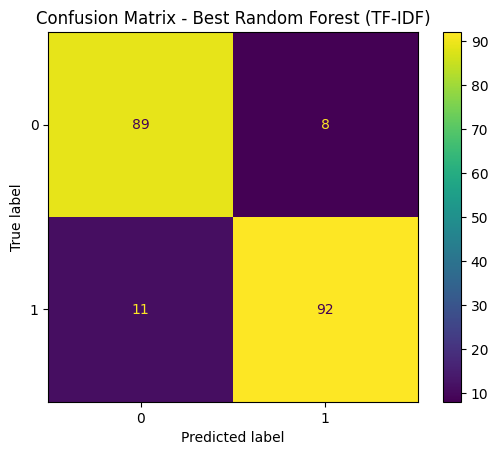

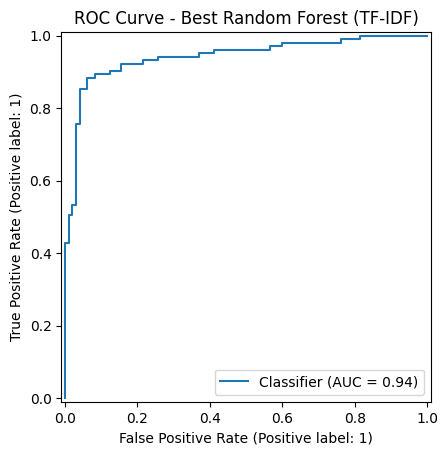

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_tfidf, y_train)

best_rf = grid_search_rf.best_estimator_
evaluate_model(best_rf, X_train_tfidf, X_test_tfidf, y_train, y_test, name="Best Random Forest (TF-IDF)")


In [40]:
##%%
from sklearn.model_selection import cross_val_score

# Cross-validate SVM with GloVe
svm = SVC(kernel='linear', probability=True)
scores = cross_val_score(svm, X_glove, y, cv=5, scoring='f1')

print("SVM (GloVe) F1-score (CV mean):", np.mean(scores))


SVM (GloVe) F1-score (CV mean): 0.7589536293354093



🔍 Results for LogReg (TF-IDF + metadata)
Accuracy: 0.905
Precision: 0.9565217391304348
Recall: 0.8543689320388349
F1-score: 0.9025641025641026
ROC-AUC: 0.956060454408968


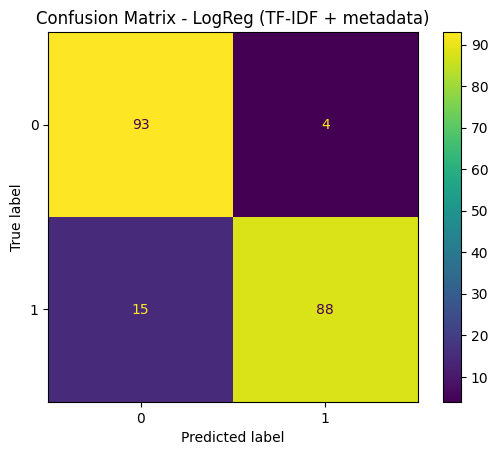

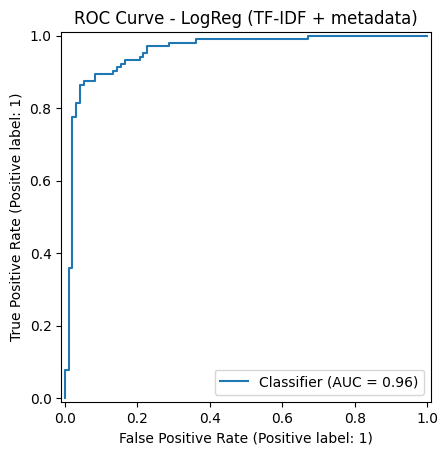

In [41]:
# adding metadata to TF-IDF (example)
X_meta = df_reduced[['text_length', 'word_count']].values
from scipy.sparse import hstack
X_tfidf_meta = hstack([X_tfidf, X_meta])

# Split with metadata
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(
    X_tfidf_meta, y, test_size=0.2, random_state=42, stratify=y
)

# Retrain with metadata
evaluate_model(LogisticRegression(max_iter=1000), X_train_meta, X_test_meta, y_train_meta, y_test_meta, name="LogReg (TF-IDF + metadata)")


### 2.2. Clustering using feature extraction or selection techniques


🔍 Results for LogReg (TF-IDF + chi2 FS)
Accuracy: 0.915
Precision: 0.9574468085106383
Recall: 0.8737864077669902
F1-score: 0.9137055837563451
ROC-AUC: 0.967770993894505


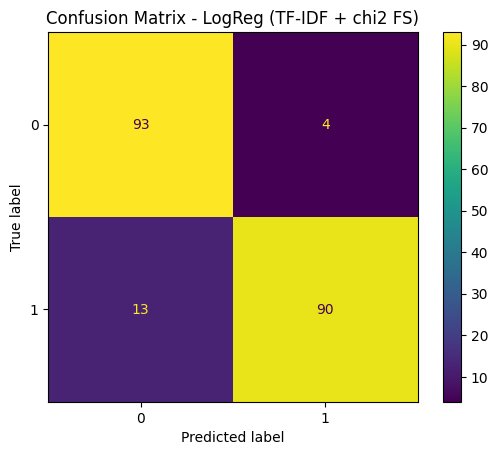

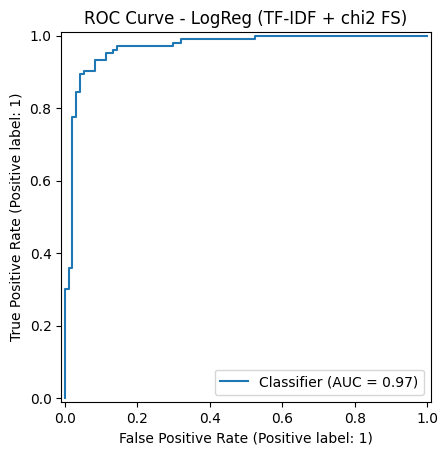

In [43]:
# feature selection?

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=1000)
X_tfidf_kbest = selector.fit_transform(X_tfidf, y)

# Now train model with selected features
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_tfidf_kbest, y, test_size=0.2, random_state=42, stratify=y
)

evaluate_model(LogisticRegression(max_iter=1000), X_train_fs, X_test_fs, y_train_fs, y_test_fs, name="LogReg (TF-IDF + chi2 FS)")


### 2.3. Recommendation Systems

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

#  similarity matrix
cosine_sim = cosine_similarity(X_tfidf)

# Create a mapping from dropdown labels to DataFrame index
article_options = [
    {'label': f"{i}: {title[:60]}", 'value': i}
    for i, title in enumerate(df_reduced['title'])
]

def get_similar_articles(index, top_n=5):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, _ in sim_scores[1:top_n+1]]
    return df_reduced.iloc[top_indices][['title', 'label_name']]


In [46]:
pip install dash


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install dash-bootstrap-components

Note: you may need to restart the kernel to use updated packages.


 ## 3. Implementation of a dashboard using the Python Dash library

To enhance the interpretability and usability of our system, we will develop an interactive dashboard using the Dash library. The dashboard will allow users to:
- Visualize LDA topic distributions across articles.
- Explore classification results (e.g., prediction confidence, misclassified examples).
- Filter documents based on predicted label, topic, or metadata.
- (Bonus) Input a news headline or article to get a live fake/real prediction.

At least one figure will relate to LDA topic modeling, and at least two more visualizations will reflect classification outcomes or document metadata. The dashboard will be designed to be interactive, where user selections dynamically update the displayed graphs.

A short optional video may also be submitted to demonstrate the functionality of the dashboard, making the team eligible for the peer-reviewed bonus.

In [52]:
import dash
from dash import html, dcc, Output, Input, State, dash_table
import dash_bootstrap_components as dbc

# pip install dash-bootstrap-components

# Create Dash app with a dark theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.CYBORG])  # Dark mode

# Compute cosine similarity (if not already)
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X_tfidf)

# Article options for dropdown
article_options = [
    {'label': f"{i}: {title[:60]}", 'value': i}
    for i, title in enumerate(df_reduced['title'])
]

# App layout
app.layout = dbc.Container([
    html.H2("📰 Fake News Recommender", className="my-3 text-primary"),
    
    dbc.Row([
        dbc.Col([
            html.Label("Choose an article:", className="text-light"),
            dcc.Dropdown(
                id='article-dropdown',
                options=article_options,
                value=0,
                style={'color': 'black'}  # So you can see it on dark bg
            ),
        ], width=8),
        
        dbc.Col([
            html.Label("Only show:", className="text-light"),
            dcc.RadioItems(
                id='label-filter',
                options=[
                    {'label': 'All', 'value': 'ALL'},
                    {'label': 'REAL only', 'value': 'REAL'},
                    {'label': 'FAKE only', 'value': 'FAKE'}
                ],
                value='ALL',
                labelStyle={'display': 'block'},
                inputStyle={"margin-right": "5px"}
            )
        ], width=4),
    ], className="mb-4"),

    html.Div(id='recommendation-output')
], fluid=True)

# Function to get similar articles
def get_similar_articles(index, label_filter='ALL', top_n=5):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, _ in sim_scores[1:]]  # exclude self

    similar_df = df_reduced.iloc[top_indices]
    if label_filter != 'ALL':
        similar_df = similar_df[similar_df['label_name'] == label_filter]

    return similar_df[['title', 'label_name']].head(top_n)

# Callback logic
@app.callback(
    Output('recommendation-output', 'children'),
    Input('article-dropdown', 'value'),
    Input('label-filter', 'value')
)
def update_recommendations(article_index, label_filter):
    selected = df_reduced.iloc[article_index]
    similar_articles = get_similar_articles(article_index, label_filter)

    return html.Div([
        html.H4(f"Selected Article: {selected['title']}", className="text-info"),
        html.P(f"Label: {selected['label_name']}", className="text-light"),
        html.H5("🔍 Top Similar Articles:", className="text-warning"),
        dash_table.DataTable(
            data=similar_articles.to_dict('records'),
            columns=[
                {'name': 'title', 'id': 'title'},
                {'name': 'label_name', 'id': 'label_name'}
            ],
            style_cell={'textAlign': 'left', 'backgroundColor': '#2c2c2c', 'color': 'white'},
            style_table={'overflowX': 'auto', 'border': '1px solid #444'},
            style_header={
                'backgroundColor': '#1f1f1f',
                'fontWeight': 'bold',
                'color': 'lightgray'
            },
        )
    ])
    
# Run the app (Jupyter compatible)
app.run(mode='inline', debug=True)


## 4. Final report and presentation.